# Implementation Model Selection Criteria(Calculating AIC, BIC and MDL ) with Petrol Consumpiton Dataset

Example : Linear Regression

Dataset : Petrol Consumption dataset

>   For one year, the consumption of petrol was measured in 48 states. The relevant variables are the petrol tax, the per capita income, the number of miles of paved highway, and the proportion of the population with driver's licenses 

*source :* https://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('../Resources/petrol_consumption.csv')
dataset.head()
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Preparing dataset

In [4]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

##  Multiple linear regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

The likelihood function for a linear regression model can be shown to be identical to the least squares function; therefore, we can estimate the maximum likelihood of the model via the mean squared error metric.

1. the model can be used to estimate an outcome for each example in the training dataset.
2. the mean_squared_error() scikit-learn function can be used to calculate the mean squared error for the model.

The specific MSE value may vary running each time, due to the stochastic nature of the learning algorithm.

In [6]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

num_params = len(regressor.coef_) + 1
print('\nNumber of parameters :', num_params)

Mean Squared Error: 4666.3447875883585

Number of parameters : 5


## Calculation Of AIC and BIC

### AIC

The AIC calculation for an ordinary least squares linear regression model can be calculated as follows (taken from “A New Look At The Statistical Identification Model“,  1974.):

$AIC = n * LL + 2 * k$

Where $n$ is the number of examples in the training dataset, $LL$ is the log-likelihood for the model using the natural logarithm (e.g. the log of the MSE), and $k$ is the number of parameters in the model.

#### Defining AIC function

- Function : calculate_aic() 
- Arguments : n(no. of examples), the raw mean squared error (mse), and k(no. of parameters).

In [7]:
from math import log

# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic

aic = calculate_aic(len(y_test), mse, num_params)
print('AIC: %.3f' % aic)

AIC: 94.481


**This value can be minimized in order to choose better models.**

## BIC

*The same example can be explored to calculate BIC* 

The BIC calculation for an ordinary least squares linear regression model can be calculated as follows (taken from [wikipedia-BIC-GaussianSpecialCase](https://en.wikipedia.org/wiki/Bayesian_information_criterion#Gaussian_special_case)):

$BIC = n * LL + k * log(n)$

Where $n$ is the number of examples in the training dataset, $LL$ is the log-likelihood for the model using the natural logarithm (e.g. log of the mean squared error), and $k$ is the number of parameters in the model, and $log()$ is the natural logarithm.


#### Defining BIC function

- Function : calculate_bic() 
- Arguments : n(no. of examples), the raw mean squared error (mse), and k(no. of parameters).

In [8]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

bic = calculate_bic(len(y_test), mse, num_params)
print('BIC: %.3f' % bic)

BIC: 95.994


*Again :* the results may vary given the stochastic nature of the learning algorithm.

In this case, the AIC is reported to be a value of about 94.48, which is very close to the BIC  value of 95.99. Again, this value can be minimized in order to choose better models.

### Sklearn.linear_model.LassoLarsIC ( Iterative Value calculation )


**LARS(Least angle regression)** : At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.


The optimization objective of Lasso is:

$(1 / (2 * n_{samples})) * ||y - X_w||^2_2 + alpha * ||w||_1$


**LARS Lasso**: 

```
class sklearn.linear_model.LassoLarsIC(criterion='aic', *, fit_intercept=True, verbose=False, normalize=True, precompute='auto', max_iter=500, eps=2.220446049250313e-16, copy_X=True, positive=False)
```

/home/mnpr_term/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/mnpr_term/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


Text(0.5, 1.0, 'Information-criterion for model selection')

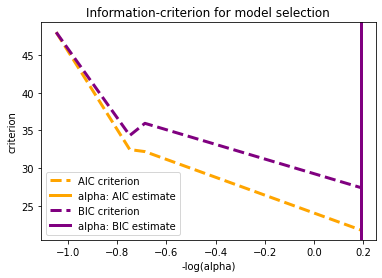

In [9]:
from sklearn.linear_model import LassoLarsIC

akaike = LassoLarsIC(criterion='aic')
akaike.fit(X, y)
alpha_aic_ = akaike.alpha_

bayesian = LassoLarsIC(criterion='bic')
bayesian.fit(X, y)
alpha_bic_ = bayesian.alpha_


def plot_aic_bic(ic, name, color):
    alpha_ = ic.alpha_
    alphas_ = ic.alphas_
    criterion_ = ic.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
plt.figure()
plot_aic_bic(akaike, 'AIC', 'orange')
plot_aic_bic(bayesian, 'BIC', 'purple')
plt.legend()
plt.title('Information-criterion for model selection')

Using the AIC and BIC to select an optimal value of the regularization parameter alpha of the Lasso estimator. AIC and BIC criteria are useful to select the value of the regularization parameter by making a trade-off between the goodness of fit and the complexity of the model. A good model should explain well the data while being simple.
As shown in the given figure we can visually determine the approximate value for good tradeoff.



## MDL

The Minimum Description Length (MDL) principle recommends choosing the hypothesis that minimizes the sum of following two description lengths.

$MDL = L(h) + L(D | h)$

Where $h$ is the model, $D$ is the predictions made by the model, $L(h)$ is the number of bits required to represent the model, and $L(D | h)$ is the number of bits required to represent the predictions from the model on the training dataset

> *minimum number of bits, or the minimum of the sum of the number of bits required to represent the data and the model.(i.e. The model with the lowest MDL) is selected*


Since the score needs to be minimized, the number of bits required to encode $(D | h)$ and the number of bits required to encode $(h)$ can be calculated as the negative log-likelihood; the negative log-likelihood of the model parameters (theta) and the negative log-likelihood of the target values (y) given the input values (X) and the model parameters (theta).

$MDL = -log(P(\theta)) – log(P(y | X, \theta))$

#### Defining MDL function

- Function : calculate_mdl() 
- Arguments : 

In [36]:
# Steps 

# 1. calculating negative log likelihood of model parameter

# 2. calculating negative log likelihood of y given X and theta



***